In [1]:
import os 
import warnings
import numpy as np
import pandas as pd
import xarray
from datetime import datetime
import cftime
from matplotlib import colors
import imageio.v2 as imageio
from tqdm import trange

from pymt.models import Topography, Era5
from matplotlib import pyplot as plt
import landlab
import rasterio
from landlab import RasterModelGrid
from landlab.components import OverlandFlow, SinkFiller 
## Landlab utilities
from landlab.io import read_esri_ascii  # OR from landlab import RasterModelGrid
from landlab.plot import imshow_grid 


#landlab components 
from landlab.components import FlowAccumulator, ChannelProfiler
from landlab.plot.drainage_plot import drainage_plot
from landlab.utils import get_watershed_mask

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/model_metadata/model_info.py:118: UserWarning: None: version string does not follow PEP440
  warnings.warn(f"{version}: version string does not follow PEP440")


In [2]:
from utils import install_api_key
install_api_key()

Enter Your OpenTopography API Key:  0a716786f6d2dcca87bfd767bd1ee434


OpenTopography API Key file is created at /home/jupyter-nsamassi@ur.roches-43e29/overlandflow_usecase/.opentopography.txt.


Enter Your CDS API Key:  0a716786f6d2dcca87bfd767bd1ee434


CDS API Key file is created at /home/jupyter-nsamassi@ur.roches-43e29/.cdsapirc


In [18]:
from bmi_topography import BmiTopography


In [19]:
m = BmiTopography()

In [20]:
study_area = 'klamath'

config_dir = os.path.join(os.getcwd(), 'config_files_{}'.format(study_area))
results_dir = os.path.join(os.getcwd(), 'results_{}'.format(study_area)) 
cache_dir = os.path.join(os.getcwd(),'cache_{}'.format(study_area))


for folder in [config_dir, results_dir, cache_dir]:
    if not os.path.isdir(folder):
        os.mkdir(folder)
        print(folder)

In [23]:
dem = Topography()
dem.initialize(os.path.join(config_dir, 'dem_config.yaml'))

/opt/tljh/user/envs/csdms/lib/python3.11/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt


#geojson_path = '/home/jupyter-nsamassi@ur.roches-43e29/CA18_Klamath.geojson'
gdf = gpd.read_file(geojson_path)

print(gdf)

gdf.plot()
plt.show()

import os
dir_name ='cache_kalmath/SRTMGL1_41.18362_-122.08_41.2894_-121.7.tif'

for filename in os.listdir(dir_name):
    if not filename.endswith(".tiff"):
        continue
    full_path = os.path.join(dir_name, filename)
    outASCII = '%s.asc' % (full_path,)
    arcpy.RasterToASCII_conversion(full_path, outASCII)

In [24]:
from bmi_geotiff import GeoTiff

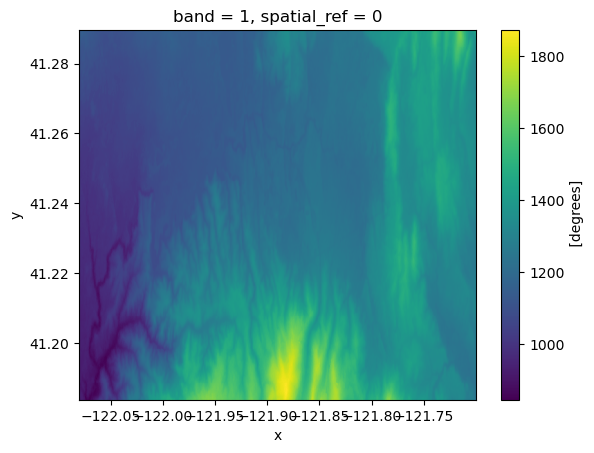

In [25]:
g=GeoTiff('cache_kalmath/SRTMGL1_41.18362_-122.08_41.2894_-121.7.tif')
g.da.plot.imshow()

In [26]:
# get DEM variable info
var_name = dem.output_var_names[0]
var_unit = dem.var_units(var_name)
var_location = dem.var_location(var_name)
var_type = dem.var_type(var_name)
var_grid = dem.var_grid(var_name)
var_itemsize = dem.var_itemsize(var_name)
var_nbytes = dem.var_nbytes(var_name)
print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}' 
            '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: land_surface__elevation 
var_unit: degrees 
var_location: face 
var_type: int16 
var_grid: 0 
var_itemsize: 2
var_nbytes: 692208 



In [27]:

#get DEM variable info
var_name = dem.output_var_names[0]
var_unit = dem.var_units(var_name)
var_location = dem.var_location(var_name)
var_type = dem.var_type(var_name)
var_grid = dem.var_grid(var_name)
var_itemsize = dem.var_itemsize(var_name)
var_nbytes = dem.var_nbytes(var_name)
print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}' 
            '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: land_surface__elevation 
var_unit: degrees 
var_location: face 
var_type: int16 
var_grid: 0 
var_itemsize: 2
var_nbytes: 692208 



In [27]:

#get DEM variable info
var_name = dem.output_var_names[0]
var_unit = dem.var_units(var_name)
var_location = dem.var_location(var_name)
var_type = dem.var_type(var_name)
var_grid = dem.var_grid(var_name)
var_itemsize = dem.var_itemsize(var_name)
var_nbytes = dem.var_nbytes(var_name)
print('variable_name: {} \nvar_unit: {} \nvar_location: {} \nvar_type: {} \nvar_grid: {} \nvar_itemsize: {}' 
            '\nvar_nbytes: {} \n'. format(var_name, var_unit, var_location, var_type, var_grid, var_itemsize, var_nbytes))

variable_name: land_surface__elevation 
var_unit: degrees 
var_location: face 
var_type: int16 
var_grid: 0 
var_itemsize: 2
var_nbytes: 692208 



In [28]:
# get DEM grid info 
dem_grid_ndim = dem.grid_ndim(var_grid) 
dem_grid_type = dem.grid_type(var_grid)
dem_grid_shape = dem.grid_shape(var_grid)
dem_grid_spacing = dem.grid_spacing(var_grid)
dem_grid_origin = dem.grid_origin(var_grid)

print('grid_ndim: {} \ngrid_type: {} \ngrid_shape: {} \ngrid_spacing: {} \ngrid_origin: {}'.format(
    dem_grid_ndim, dem_grid_type, dem_grid_shape, dem_grid_spacing, dem_grid_origin))

grid_ndim: 2 
grid_type: uniform_rectilinear 
grid_shape: [ 253 1368] 
grid_spacing: [ 0.00027778  0.00027778] 
grid_origin: [  41.15388889 -122.08      ]


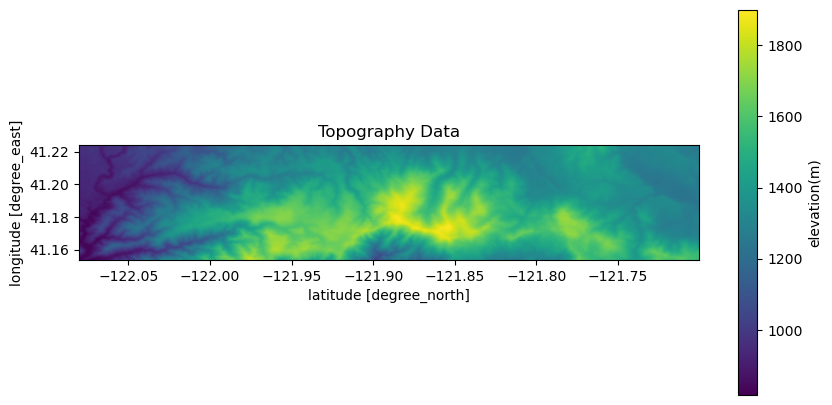

In [29]:
# get DEM variable data
dem_data = dem.get_value(var_name)
dem_data_2D = dem_data.reshape(dem_grid_shape)

# get X, Y extent for plot
min_y, min_x = dem_grid_origin
max_y = min_y + dem_grid_spacing[0]*(dem_grid_shape[0]-1)
max_x = min_x + dem_grid_spacing[1]*(dem_grid_shape[1]-1)
dy = dem_grid_spacing[0]/2
dx = dem_grid_spacing[1]/2
dem_extent = [min_x - dx, max_x + dx, min_y - dy, max_y + dy]

# plot DEM data
fig, ax = plt.subplots(1,1,figsize=(10,5))
im = ax.imshow(dem_data_2D, extent=dem_extent)
ax.title.set_text('Topography Data')
ax.set_xlabel('latitude [degree_north]')
ax.set_ylabel('longitude [degree_east]')
fig.colorbar(im,label='elevation(m)')

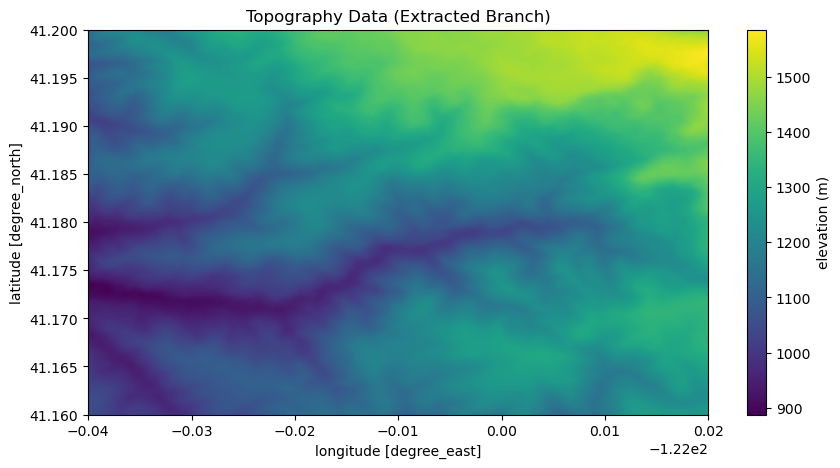

In [43]:
#  coordinates for the branch on the left side
branch_min_x = -122.04  
branch_max_x = -121.98  
branch_min_y = 41.16    
branch_max_y = 41.20    

# indices for slicing the array
min_y_idx = int((branch_min_y - min_y) / dem_grid_spacing[0])
max_y_idx = int((branch_max_y - min_y) / dem_grid_spacing[0])
min_x_idx = int((branch_min_x - min_x) / dem_grid_spacing[1])
max_x_idx = int((branch_max_x - min_x) / dem_grid_spacing[1])

# Extraction of subsett 
dem_data_branch = dem_data_2D[min_y_idx:max_y_idx+1, min_x_idx:max_x_idx+1]

# Adjusting for the specific area
branch_extent = [branch_min_x, branch_max_x, branch_min_y, branch_max_y]

# Plot the extracted branch data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
im = ax.imshow(dem_data_branch, extent=branch_extent, origin='lower', aspect='auto')
ax.title.set_text('Topography Data (Extracted Branch)')
ax.set_xlabel('longitude [degree_east]')
ax.set_ylabel('latitude [degree_north]')
fig.colorbar(im, label='elevation (m)')
plt.show()


In [44]:
#save for Nikki 
# Save the extracted data as a NumPy file
np.save('/home/jupyter-nsamassi@ur.roches-43e29/extracted_branch_topo.npy', dem_data_branch)


In [16]:
# Now, after generating the topography Data and map, we can move on to the precipitation part

## PRECIPITATION